### (0 баллов) Считываем данные

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [3]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [4]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

preds

[22.72408905 24.46325093 27.13118933 18.0947385  24.60688337  9.24909559
 20.55319475 -5.84431576 16.15024182 19.09476199  4.90611442 22.26101912
 11.37875429 20.62737745 12.26252792 22.4231069  21.92643395  9.60359165
 30.46270659 17.37996479 22.36692986 40.12053235 30.94053589 41.89030866
  5.51940446  6.428778   26.92135532 15.85815382 22.55401165 23.12615817
 22.34617545 18.49651045 30.85277881 15.82321798 20.74948678 25.2299585
 21.22266355 21.17056601 16.85979851 25.43347834 19.79522548 19.43089367
 35.34314716 24.44969688 15.8755278  27.24603566 13.66974171 20.11327762
 17.6774256  25.49790363 10.58743358]


### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [13]:
from sklearn.metrics import mean_squared_error

def MSE(y_real, y_pred):
    assert y_real.shape == y_pred.shape
    return ((y_real - y_pred)**2).sum() / y_real.size

Проверим корректность работы

In [14]:
assert MSE(y_test, preds) == mean_squared_error(y_test, preds)

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [17]:
print(f"Our MSE result: {MSE(y_test, preds)}")
print(f"Our MSE result: {((dataset['target'] - dataset['target'].mean())**2).sum() / dataset['target'].size}")

Our MSE result: 25.797637718248136
Our MSE result: 84.41955615616556


К счастью, мы гораздо лучше наивного алгоритма))

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [19]:
from sklearn.linear_model import Ridge

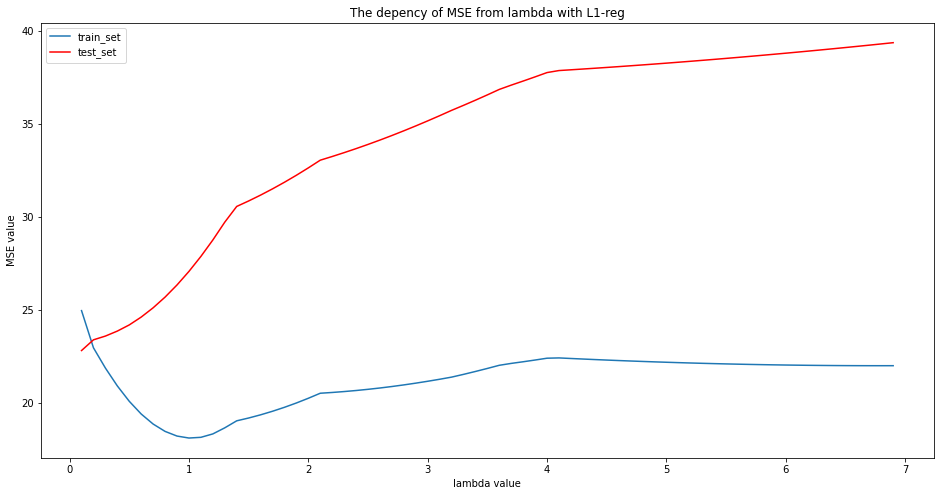

In [30]:
lambdas = np.arange(0.1, 7.0, 0.1)
test_errors = []
train_errors = []

for val in lambdas:
    reg = Lasso(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    test_errors.append(mean_squared_error(y_pred, y_test))
    train_errors.append(mean_squared_error(reg.predict(X_train), y_train))

plt.plot(lambdas, test_errors)
plt.plot(lambdas, train_errors, c='r')
plt.legend(['train_set', 'test_set'])
plt.xlabel('lambda value')
plt.ylabel('MSE value')
plt.title('The depency of MSE from lambda with L1-reg')
None

In [36]:
print(f'The best MSE: {min(test_errors)} with lambda-coeff = 1')

The best MSE: 18.115073523694225 with lambda-coeff = 1


Выходит, что улучшили)

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

***Вывод***

Из графика видно, что при относительно небольших коэффициентах регуляризации (до 1) значение функции ошибки на тестовом датасете падает - это как раз то, что нам нужно))

При этом перманентно растет ошибка на тренировочном датасете. Значит, допуская больше ошибок при обучении, обобщающая способность алгоритма при работе с новыми данными растет -- это хорошо)

Лучший MSE = 18.115073523694225 я получил с коэффициентом регуляризации 1